# Supervivencia en el Titanic utilizando un árbol de decisión.

---



Partiendo de la lista de pasajeros del Titanic como conjunto de datos, utilizaremos un algoritmo de machine learning de **árbol de decisión** con el objetivo de generar un modelo para predecir la supervivencia de pasajeros del Titanic.

Al ser un problema de **clasificación**, utilizaremos un algoritmo **supervisado** de **árbol de decisión de clasificación** y calcularemos la precisión del modelo.

### Preprocesamiento de los datos

En la fase de preprocesado de datos, realizaremos las siguientes acciones:

*   Importar las librerías Python necesarias.
*   Lectura del archivo .csv del conjunto de datos.
*   Visualización del conjunto de datos.
*   Visualización de los tipos de datos del conjunto de datos.
*   Validación de datos no disponibles en el dataset.



In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('titanic.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Selección de variables para el modelo

En este apartado realizaremos la ingeniería y selección final de las variables del conjunto de datos para nuestro modelo.

A priori hay variables que no nos van a ser útiles a la hora de generar el modelo, como puede ser un identificador o nombre y variables que por el contrario tengan el mismo valor en una proporción muy alta en el dataset y por lo tanto no tienen una buena entropía.

En el apartado de preprocesado de datos observamos que hay dos variables 'Age' y 'Cabin' que tienen valores vacios. En el caso de la variable 'Age' vamos a descartar aquellas observaciones en las que no esté disponible el valor. En el caso de la variable 'Cabin' al no disponer de una amplia mayoría de los datos descartamos ese atributo para generar el modelo.

La variable 'Sex' que viene expresada como una cadena de caracteres la vamos a transformar a valores numéricos para que el modelo pueda entender estos datos.


In [0]:
datafinal = data[data.Age > 0]
datafinal.Sex[datafinal.Sex == 'female'] = 0
datafinal.Sex[datafinal.Sex == 'male'] = 1
datafinal.Sex = datafinal.Sex.astype(int)

Una vez transformados los datos, se visualizará la tabla de correlaciones de las variables del conjunto de datos.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
corr_features = datafinal
correlation_matrix = corr_features.corr()
display(correlation_matrix)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.024575,0.036847,-0.082398,-0.011617,0.014231
Survived,0.029340,1.000000,-0.359653,-0.538826,-0.077221,-0.017358,0.093317,0.067105
Pclass,-0.035349,-0.359653,1.000000,0.155460,-0.369226,0.067247,0.025683,-0.117992
Sex,0.024575,-0.538826,0.155460,1.000000,0.093254,-0.103950,-0.246972,-0.122004
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,-0.025304
SibSp,-0.082398,-0.017358,0.067247,-0.103950,-0.308247,1.000000,0.383820,0.125884
Parch,-0.011617,0.093317,0.025683,-0.246972,-0.189119,0.383820,1.000000,0.107081
Fare,0.014231,0.067105,-0.117992,-0.122004,-0.025304,0.125884,0.107081,1.000000


Mapa de calor de las correlaciones de las variables

Estudiando el mapa de correlaciones, seleccionaremos para nuestro modelo las variables 'Age', 'Sex' y 'PClass'


In [0]:
x = datafinal[['Age', 'Sex', 'Pclass']]
y = datafinal[['Survived']]

### Entrenamiento y prueba del modelo

Para realizar el entrenamiento y prueba del modelo se divide en dos partes el dataset. El porcentaje de entrenamiento (train) será del 80% y el porcentaje de datos de prueba (test) será del 20%.

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Generación del modelo

El algoritmo de Machine Learning que se utilizará para generar el modelo será un **arbol de decisión de clasificación**, en este caso configuramos el árbol con un hiperparámetro de máxima profundidad del árbol de 3.

In [0]:
from sklearn.tree import DecisionTreeClassifier
modeloADC = DecisionTreeClassifier(max_depth=3)

Generación del modelo utilizando el dataset de entrenamiento.

In [9]:
modeloADC.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predicción de datos del modelo

Predicción de datos utilizando el dataset de prueba.

In [0]:
y_pred = modeloADC.predict(x_test)

### Precisión del modelo

Para medir la precisón de nuestro modelo, se contabilizará el porcentaje en el que los valores de test y los valores de la predicción son iguales.

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7762237762237763

### Visualización del árbol de decisión

Finalmente podemos visualizar el modelo de **árbol de decisión de clasificación** que ha generado el algoritmo de machine learning con los datos de entrenamiento. 

In [0]:
import os
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

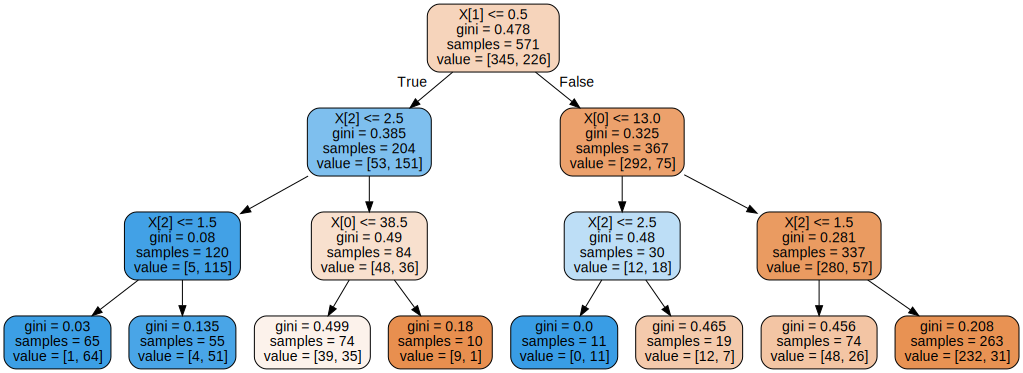

In [13]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(modeloADC, out_file=os.path.join(IMAGES_PATH, "arbol.dot"), rounded=True, filled=True)
Source.from_file(os.path.join(IMAGES_PATH, "arbol.dot"))